<a href="https://colab.research.google.com/github/2003MADHAV/Deeplearning_project_beased_experiments-/blob/main/009_Improving_generalization_with_regularization.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt

from keras.models import Sequential
from keras.layers import Dense, Dropout
from keras import regularizers

In [ ]:
# Dataset can be downloaded at https://archive.ics.uci.edu/ml/machine-learning-databases/00275/

In [ ]:
data = pd.read_csv('C:\\Users\\ifsrk\\Documents\\01 Deep Learning\\001 Handson\\hour.csv')
data

,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,0,6,0,1,0.24,0.2879,0.81,0.0000,3,13,16
1,2,2011-01-01,1,0,1,1,0,6,0,1,0.22,0.2727,0.80,0.0000,8,32,40
2,3,2011-01-01,1,0,1,2,0,6,0,1,0.22,0.2727,0.80,0.0000,5,27,32
3,4,2011-01-01,1,0,1,3,0,6,0,1,0.24,0.2879,0.75,0.0000,3,10,13
4,5,2011-01-01,1,0,1,4,0,6,0,1,0.24,0.2879,0.75,0.0000,0,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17374,17375,2012-12-31,1,1,12,19,0,1,1,2,0.26,0.2576,0.60,0.1642,11,108,119
17375,17376,2012-12-31,1,1,12,20,0,1,1,2,0.26,0.2576,0.60,0.1642,8,81,89
17376,17377,2012-12-31,1,1,12,21,0,1,1,1,0.26,0.2576,0.60,0.1642,7,83,90
17377,17378,2012-12-31,1,1,12,22,0,1,1,1,0.26,0.2727,0.56,0.1343,13,48,61


In [ ]:
# Feature engineering
ohe_features = ['season', 'weathersit', 'mnth', 'hr', 'weekday']
for feature in ohe_features:
    dummies = pd.get_dummies(data[feature], prefix=feature, drop_first=False)
    data = pd.concat([data, dummies], axis=1)

data

,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,...,hr_21,hr_22,hr_23,weekday_0,weekday_1,weekday_2,weekday_3,weekday_4,weekday_5,weekday_6
0,1,2011-01-01,1,0,1,0,0,6,0,1,...,0,0,0,0,0,0,0,0,0,1
1,2,2011-01-01,1,0,1,1,0,6,0,1,...,0,0,0,0,0,0,0,0,0,1
2,3,2011-01-01,1,0,1,2,0,6,0,1,...,0,0,0,0,0,0,0,0,0,1
3,4,2011-01-01,1,0,1,3,0,6,0,1,...,0,0,0,0,0,0,0,0,0,1
4,5,2011-01-01,1,0,1,4,0,6,0,1,...,0,0,0,0,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17374,17375,2012-12-31,1,1,12,19,0,1,1,2,...,0,0,0,0,1,0,0,0,0,0
17375,17376,2012-12-31,1,1,12,20,0,1,1,2,...,0,0,0,0,1,0,0,0,0,0
17376,17377,2012-12-31,1,1,12,21,0,1,1,1,...,1,0,0,0,1,0,0,0,0,0
17377,17378,2012-12-31,1,1,12,22,0,1,1,1,...,0,1,0,0,1,0,0,0,0,0


In [ ]:
drop_features = ['instant', 'dteday', 'season', 'weathersit',
                  'weekday', 'atemp', 'mnth', 'workingday', 'hr', 'casual', 'registered']
data = data.drop(drop_features, axis=1)
data

,yr,holiday,temp,hum,windspeed,cnt,season_1,season_2,season_3,season_4,...,hr_21,hr_22,hr_23,weekday_0,weekday_1,weekday_2,weekday_3,weekday_4,weekday_5,weekday_6
0,0,0,0.24,0.81,0.0000,16,1,0,0,0,...,0,0,0,0,0,0,0,0,0,1
1,0,0,0.22,0.80,0.0000,40,1,0,0,0,...,0,0,0,0,0,0,0,0,0,1
2,0,0,0.22,0.80,0.0000,32,1,0,0,0,...,0,0,0,0,0,0,0,0,0,1
3,0,0,0.24,0.75,0.0000,13,1,0,0,0,...,0,0,0,0,0,0,0,0,0,1
4,0,0,0.24,0.75,0.0000,1,1,0,0,0,...,0,0,0,0,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17374,1,0,0.26,0.60,0.1642,119,1,0,0,0,...,0,0,0,0,1,0,0,0,0,0
17375,1,0,0.26,0.60,0.1642,89,1,0,0,0,...,0,0,0,0,1,0,0,0,0,0
17376,1,0,0.26,0.60,0.1642,90,1,0,0,0,...,1,0,0,0,1,0,0,0,0,0
17377,1,0,0.26,0.56,0.1343,61,1,0,0,0,...,0,1,0,0,1,0,0,0,0,0


In [ ]:
norm_features = ['cnt', 'temp', 'hum', 'windspeed']
scaled_features = {}
for feature in norm_features:
    mean, std = data[feature].mean(), data[feature].std()
    scaled_features[feature] = [mean, std]
    data.loc[:, feature] = (data[feature] - mean)/std

data

,yr,holiday,temp,hum,windspeed,cnt,season_1,season_2,season_3,season_4,...,hr_21,hr_22,hr_23,weekday_0,weekday_1,weekday_2,weekday_3,weekday_4,weekday_5,weekday_6
0,0,0,-1.334609,0.947345,-1.553844,-0.956312,1,0,0,0,...,0,0,0,0,0,0,0,0,0,1
1,0,0,-1.438475,0.895513,-1.553844,-0.823998,1,0,0,0,...,0,0,0,0,0,0,0,0,0,1
2,0,0,-1.438475,0.895513,-1.553844,-0.868103,1,0,0,0,...,0,0,0,0,0,0,0,0,0,1
3,0,0,-1.334609,0.636351,-1.553844,-0.972851,1,0,0,0,...,0,0,0,0,0,0,0,0,0,1
4,0,0,-1.334609,0.636351,-1.553844,-1.039008,1,0,0,0,...,0,0,0,0,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17374,1,0,-1.230743,-0.141133,-0.211685,-0.388467,1,0,0,0,...,0,0,0,0,1,0,0,0,0,0
17375,1,0,-1.230743,-0.141133,-0.211685,-0.553859,1,0,0,0,...,0,0,0,0,1,0,0,0,0,0
17376,1,0,-1.230743,-0.141133,-0.211685,-0.548346,1,0,0,0,...,1,0,0,0,1,0,0,0,0,0
17377,1,0,-1.230743,-0.348463,-0.456086,-0.708224,1,0,0,0,...,0,1,0,0,1,0,0,0,0,0


In [ ]:
data[-31*24:]

,yr,holiday,temp,hum,windspeed,cnt,season_1,season_2,season_3,season_4,...,hr_21,hr_22,hr_23,weekday_0,weekday_1,weekday_2,weekday_3,weekday_4,weekday_5,weekday_6
16635,1,0,-1.023012,0.636351,-1.553844,-0.145892,0,0,0,1,...,0,1,0,0,0,0,0,0,1,0
16636,1,0,-1.023012,0.636351,-0.821460,-0.438084,0,0,0,1,...,0,0,1,0,0,0,0,0,1,0
16637,1,0,-1.230743,0.947345,-1.553844,-0.449111,0,0,0,1,...,0,0,0,0,0,0,0,0,0,1
16638,1,0,-1.230743,0.947345,-1.553844,-0.664120,0,0,0,1,...,0,0,0,0,0,0,0,0,0,1
16639,1,0,-1.230743,0.947345,-1.553844,-0.768868,0,0,0,1,...,0,0,0,0,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17374,1,0,-1.230743,-0.141133,-0.211685,-0.388467,1,0,0,0,...,0,0,0,0,1,0,0,0,0,0
17375,1,0,-1.230743,-0.141133,-0.211685,-0.553859,1,0,0,0,...,0,0,0,0,1,0,0,0,0,0
17376,1,0,-1.230743,-0.141133,-0.211685,-0.548346,1,0,0,0,...,1,0,0,0,1,0,0,0,0,0
17377,1,0,-1.230743,-0.348463,-0.456086,-0.708224,1,0,0,0,...,0,1,0,0,1,0,0,0,0,0


In [ ]:
# Save the final month for testing
# 744 rows
test_data = data[-31*24:]
data = data[:-31*24]
# Extract the target field
target_fields = ['cnt']
features, targets = data.drop(target_fields, axis=1), data[target_fields]
test_features, test_targets = test_data.drop(target_fields, axis=1), test_data[target_fields]
# Create a validation set (based on the last )
X_train, y_train = features[:-30*24], targets[:-30*24]
X_val, y_val = features[-30*24:], targets[-30*24:]

In [ ]:
model = Sequential()
model.add(Dense(250, input_dim=X_train.shape[1], activation='relu'))
model.add(Dense(150, activation='relu'))
model.add(Dense(50, activation='relu'))
model.add(Dense(25, activation='relu'))
model.add(Dense(1, activation='linear'))

# Compile model
model.compile(loss='mse', optimizer='sgd', metrics=['mse'])

In [ ]:
n_epochs = 4000
batch_size = 1024

history = model.fit(X_train.values, y_train['cnt'],
                 validation_data=(X_val.values, y_val['cnt']),
                 batch_size=batch_size, epochs=n_epochs, verbose=0
                )

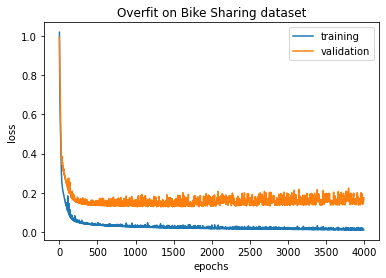

In [ ]:
plt.plot(np.arange(len(history.history['loss'])), history.history['loss'], label='training')
plt.plot(np.arange(len(history.history['val_loss'])), history.history['val_loss'], label='validation')
plt.title('Overfit on Bike Sharing dataset')
plt.xlabel('epochs')
plt.ylabel('loss')
plt.legend(loc=0)
plt.show()

In [ ]:
print('Minimum loss: ', min(history.history['val_loss']),
      '\nAfter ', np.argmin(history.history['val_loss']), ' epochs')

# Minimum loss:  0.140975862741
# After  730  epochs

Minimum loss:  0.12803468108177185 
After  1158  epochs


In [ ]:
model_reg = Sequential()
model_reg.add(Dense(250, input_dim=X_train.shape[1], activation='relu',
            kernel_regularizer=regularizers.l2(0.005)))
model_reg.add(Dense(150, activation='relu'))
model_reg.add(Dense(50, activation='relu'))
model_reg.add(Dense(25, activation='relu',
            kernel_regularizer=regularizers.l2(0.005)))
model_reg.add(Dense(1, activation='linear'))

# Compile model
model_reg.compile(loss='mse', optimizer='sgd', metrics=['mse'])

In [ ]:
history_reg = model_reg.fit(X_train.values, y_train['cnt'],
validation_data=(X_val.values, y_val['cnt']),
                 batch_size=batch_size, epochs=n_epochs, verbose=1
                )

Epoch 1/4000
16/16 [==============================] - 2s 31ms/step - loss: 1.5786 - mse: 0.9657 - val_loss: 1.5893 - val_mse: 0.9775
Epoch 2/4000
16/16 [==============================] - 0s 15ms/step - loss: 1.5121 - mse: 0.9011 - val_loss: 1.5824 - val_mse: 0.9723
Epoch 3/4000
16/16 [==============================] - 0s 14ms/step - loss: 1.4533 - mse: 0.8439 - val_loss: 1.5690 - val_mse: 0.9605
Epoch 4/4000
16/16 [==============================] - 0s 14ms/step - loss: 1.3974 - mse: 0.7896 - val_loss: 1.5516 - val_mse: 0.9447
Epoch 5/4000
16/16 [==============================] - 0s 13ms/step - loss: 1.3478 - mse: 0.7416 - val_loss: 1.5360 - val_mse: 0.9306
Epoch 6/4000
16/16 [==============================] - 0s 14ms/step - loss: 1.3059 - mse: 0.7013 - val_loss: 1.5272 - val_mse: 0.9234
Epoch 7/4000
16/16 [==============================] - 0s 15ms/step - loss: 1.2718 - mse: 0.6688 - val_loss: 1.5012 - val_mse: 0.8991
Epoch 8/4000
16/16 [==============================] - 0s 14ms/step - 

16/16 [==============================] - 0s 13ms/step - loss: 0.6821 - mse: 0.1669 - val_loss: 0.7960 - val_mse: 0.2817
Epoch 63/4000
16/16 [==============================] - 0s 13ms/step - loss: 0.6797 - mse: 0.1660 - val_loss: 0.7937 - val_mse: 0.2809
Epoch 64/4000
16/16 [==============================] - 0s 12ms/step - loss: 0.6760 - mse: 0.1639 - val_loss: 0.7932 - val_mse: 0.2819
Epoch 65/4000
16/16 [==============================] - 0s 13ms/step - loss: 0.6723 - mse: 0.1617 - val_loss: 0.7875 - val_mse: 0.2777
Epoch 66/4000
16/16 [==============================] - 0s 12ms/step - loss: 0.6689 - mse: 0.1598 - val_loss: 0.7851 - val_mse: 0.2768
Epoch 67/4000
16/16 [==============================] - 0s 16ms/step - loss: 0.6653 - mse: 0.1578 - val_loss: 0.7856 - val_mse: 0.2788
Epoch 68/4000
16/16 [==============================] - 0s 17ms/step - loss: 0.6623 - mse: 0.1562 - val_loss: 0.7798 - val_mse: 0.2745
Epoch 69/4000
16/16 [==============================] - 0s 14ms/step - loss: 

16/16 [==============================] - 0s 16ms/step - loss: 0.5081 - mse: 0.0782 - val_loss: 0.6289 - val_mse: 0.1996
Epoch 124/4000
16/16 [==============================] - 0s 15ms/step - loss: 0.5049 - mse: 0.0762 - val_loss: 0.6236 - val_mse: 0.1956
Epoch 125/4000
16/16 [==============================] - 0s 19ms/step - loss: 0.5033 - mse: 0.0758 - val_loss: 0.6184 - val_mse: 0.1917
Epoch 126/4000
16/16 [==============================] - 0s 13ms/step - loss: 0.5013 - mse: 0.0751 - val_loss: 0.6179 - val_mse: 0.1924
Epoch 127/4000
16/16 [==============================] - 0s 18ms/step - loss: 0.4998 - mse: 0.0749 - val_loss: 0.6170 - val_mse: 0.1929
Epoch 128/4000
16/16 [==============================] - 0s 15ms/step - loss: 0.4967 - mse: 0.0731 - val_loss: 0.6171 - val_mse: 0.1942
Epoch 129/4000
16/16 [==============================] - 0s 13ms/step - loss: 0.4974 - mse: 0.0751 - val_loss: 0.6194 - val_mse: 0.1978
Epoch 130/4000
16/16 [==============================] - 0s 20ms/step -

Epoch 184/4000
16/16 [==============================] - 0s 13ms/step - loss: 0.4100 - mse: 0.0527 - val_loss: 0.5209 - val_mse: 0.1642
Epoch 185/4000
16/16 [==============================] - 0s 13ms/step - loss: 0.4084 - mse: 0.0522 - val_loss: 0.5167 - val_mse: 0.1611
Epoch 186/4000
16/16 [==============================] - 0s 13ms/step - loss: 0.4066 - mse: 0.0515 - val_loss: 0.5095 - val_mse: 0.1549
Epoch 187/4000
16/16 [==============================] - 0s 13ms/step - loss: 0.4072 - mse: 0.0531 - val_loss: 0.5254 - val_mse: 0.1720
Epoch 188/4000
16/16 [==============================] - 0s 12ms/step - loss: 0.4060 - mse: 0.0531 - val_loss: 0.5173 - val_mse: 0.1649
Epoch 189/4000
16/16 [==============================] - 0s 13ms/step - loss: 0.4065 - mse: 0.0546 - val_loss: 0.5108 - val_mse: 0.1594
Epoch 190/4000
16/16 [==============================] - 0s 14ms/step - loss: 0.4022 - mse: 0.0514 - val_loss: 0.5244 - val_mse: 0.1741
Epoch 191/4000
16/16 [==============================] -

Epoch 245/4000
16/16 [==============================] - 0s 15ms/step - loss: 0.3479 - mse: 0.0511 - val_loss: 0.4492 - val_mse: 0.1529
Epoch 246/4000
16/16 [==============================] - 0s 14ms/step - loss: 0.3468 - mse: 0.0509 - val_loss: 0.4471 - val_mse: 0.1517
Epoch 247/4000
16/16 [==============================] - 0s 15ms/step - loss: 0.3398 - mse: 0.0448 - val_loss: 0.4505 - val_mse: 0.1560
Epoch 248/4000
16/16 [==============================] - 0s 14ms/step - loss: 0.3374 - mse: 0.0433 - val_loss: 0.4347 - val_mse: 0.1411
Epoch 249/4000
16/16 [==============================] - 0s 12ms/step - loss: 0.3423 - mse: 0.0491 - val_loss: 0.4350 - val_mse: 0.1424
Epoch 250/4000
16/16 [==============================] - 0s 14ms/step - loss: 0.3353 - mse: 0.0430 - val_loss: 0.4347 - val_mse: 0.1429
Epoch 251/4000
16/16 [==============================] - 0s 13ms/step - loss: 0.3341 - mse: 0.0427 - val_loss: 0.4329 - val_mse: 0.1420
Epoch 252/4000
16/16 [==============================] -

Epoch 306/4000
16/16 [==============================] - 0s 13ms/step - loss: 0.2911 - mse: 0.0441 - val_loss: 0.3803 - val_mse: 0.1338
Epoch 307/4000
16/16 [==============================] - 0s 13ms/step - loss: 0.2859 - mse: 0.0397 - val_loss: 0.3809 - val_mse: 0.1351
Epoch 308/4000
16/16 [==============================] - 0s 15ms/step - loss: 0.2855 - mse: 0.0400 - val_loss: 0.3806 - val_mse: 0.1355
Epoch 309/4000
16/16 [==============================] - 0s 18ms/step - loss: 0.2834 - mse: 0.0387 - val_loss: 0.3848 - val_mse: 0.1404
Epoch 310/4000
16/16 [==============================] - 0s 14ms/step - loss: 0.2827 - mse: 0.0387 - val_loss: 0.3806 - val_mse: 0.1370
Epoch 311/4000
16/16 [==============================] - 0s 13ms/step - loss: 0.2820 - mse: 0.0387 - val_loss: 0.3838 - val_mse: 0.1409
Epoch 312/4000
16/16 [==============================] - 0s 14ms/step - loss: 0.2814 - mse: 0.0388 - val_loss: 0.3796 - val_mse: 0.1375
Epoch 313/4000
16/16 [==============================] -

Epoch 367/4000
16/16 [==============================] - 0s 15ms/step - loss: 0.2424 - mse: 0.0363 - val_loss: 0.3404 - val_mse: 0.1346
Epoch 368/4000
16/16 [==============================] - 0s 13ms/step - loss: 0.2430 - mse: 0.0375 - val_loss: 0.3382 - val_mse: 0.1331
Epoch 369/4000
16/16 [==============================] - 0s 13ms/step - loss: 0.2452 - mse: 0.0403 - val_loss: 0.3394 - val_mse: 0.1349
Epoch 370/4000
16/16 [==============================] - 0s 13ms/step - loss: 0.2478 - mse: 0.0435 - val_loss: 0.3356 - val_mse: 0.1317
Epoch 371/4000
16/16 [==============================] - 0s 13ms/step - loss: 0.2409 - mse: 0.0372 - val_loss: 0.3412 - val_mse: 0.1378
Epoch 372/4000
16/16 [==============================] - 0s 12ms/step - loss: 0.2394 - mse: 0.0363 - val_loss: 0.3388 - val_mse: 0.1360
Epoch 373/4000
16/16 [==============================] - 0s 13ms/step - loss: 0.2425 - mse: 0.0400 - val_loss: 0.3523 - val_mse: 0.1501
Epoch 374/4000
16/16 [==============================] -

Epoch 428/4000
16/16 [==============================] - 0s 14ms/step - loss: 0.2070 - mse: 0.0344 - val_loss: 0.3088 - val_mse: 0.1365
Epoch 429/4000
16/16 [==============================] - 0s 14ms/step - loss: 0.2065 - mse: 0.0344 - val_loss: 0.3116 - val_mse: 0.1398
Epoch 430/4000
16/16 [==============================] - 0s 15ms/step - loss: 0.2064 - mse: 0.0347 - val_loss: 0.3030 - val_mse: 0.1316
Epoch 431/4000
16/16 [==============================] - 0s 13ms/step - loss: 0.2118 - mse: 0.0406 - val_loss: 0.3154 - val_mse: 0.1446
Epoch 432/4000
16/16 [==============================] - 0s 15ms/step - loss: 0.2283 - mse: 0.0576 - val_loss: 0.3053 - val_mse: 0.1350
Epoch 433/4000
16/16 [==============================] - 0s 15ms/step - loss: 0.2159 - mse: 0.0458 - val_loss: 0.2999 - val_mse: 0.1300
Epoch 434/4000
16/16 [==============================] - 0s 15ms/step - loss: 0.2040 - mse: 0.0343 - val_loss: 0.3056 - val_mse: 0.1362
Epoch 435/4000
16/16 [==============================] -

Epoch 489/4000
16/16 [==============================] - 0s 17ms/step - loss: 0.1869 - mse: 0.0417 - val_loss: 0.2754 - val_mse: 0.1305
Epoch 490/4000
16/16 [==============================] - 0s 16ms/step - loss: 0.1813 - mse: 0.0366 - val_loss: 0.2748 - val_mse: 0.1303
Epoch 491/4000
16/16 [==============================] - 0s 17ms/step - loss: 0.1828 - mse: 0.0385 - val_loss: 0.2778 - val_mse: 0.1337
Epoch 492/4000
16/16 [==============================] - 0s 16ms/step - loss: 0.1906 - mse: 0.0467 - val_loss: 0.2797 - val_mse: 0.1360
Epoch 493/4000
16/16 [==============================] - 0s 13ms/step - loss: 0.1864 - mse: 0.0429 - val_loss: 0.2764 - val_mse: 0.1331
Epoch 494/4000
16/16 [==============================] - 0s 13ms/step - loss: 0.1852 - mse: 0.0421 - val_loss: 0.2778 - val_mse: 0.1349
Epoch 495/4000
16/16 [==============================] - 0s 13ms/step - loss: 0.1840 - mse: 0.0412 - val_loss: 0.2736 - val_mse: 0.1312
Epoch 496/4000
16/16 [==============================] -

Epoch 550/4000
16/16 [==============================] - 0s 13ms/step - loss: 0.1578 - mse: 0.0352 - val_loss: 0.2572 - val_mse: 0.1347
Epoch 551/4000
16/16 [==============================] - 0s 13ms/step - loss: 0.1540 - mse: 0.0318 - val_loss: 0.2532 - val_mse: 0.1311
Epoch 552/4000
16/16 [==============================] - 0s 14ms/step - loss: 0.1636 - mse: 0.0417 - val_loss: 0.2657 - val_mse: 0.1439
Epoch 553/4000
16/16 [==============================] - 0s 13ms/step - loss: 0.1730 - mse: 0.0514 - val_loss: 0.2697 - val_mse: 0.1483
Epoch 554/4000
16/16 [==============================] - 0s 17ms/step - loss: 0.1549 - mse: 0.0336 - val_loss: 0.2575 - val_mse: 0.1364
Epoch 555/4000
16/16 [==============================] - 0s 17ms/step - loss: 0.1529 - mse: 0.0319 - val_loss: 0.2640 - val_mse: 0.1432
Epoch 556/4000
16/16 [==============================] - 0s 13ms/step - loss: 0.1600 - mse: 0.0394 - val_loss: 0.2741 - val_mse: 0.1536
Epoch 557/4000
16/16 [==============================] -

Epoch 611/4000
16/16 [==============================] - 0s 13ms/step - loss: 0.1415 - mse: 0.0374 - val_loss: 0.2330 - val_mse: 0.1291
Epoch 612/4000
16/16 [==============================] - 0s 14ms/step - loss: 0.1364 - mse: 0.0326 - val_loss: 0.2366 - val_mse: 0.1329
Epoch 613/4000
16/16 [==============================] - 0s 13ms/step - loss: 0.1470 - mse: 0.0434 - val_loss: 0.2577 - val_mse: 0.1543
Epoch 614/4000
16/16 [==============================] - 0s 12ms/step - loss: 0.1662 - mse: 0.0629 - val_loss: 0.2420 - val_mse: 0.1389
Epoch 615/4000
16/16 [==============================] - 0s 13ms/step - loss: 0.1374 - mse: 0.0344 - val_loss: 0.2479 - val_mse: 0.1450
Epoch 616/4000
16/16 [==============================] - 0s 12ms/step - loss: 0.1372 - mse: 0.0344 - val_loss: 0.2287 - val_mse: 0.1261
Epoch 617/4000
16/16 [==============================] - 0s 14ms/step - loss: 0.1342 - mse: 0.0317 - val_loss: 0.2336 - val_mse: 0.1313
Epoch 618/4000
16/16 [==============================] -

Epoch 672/4000
16/16 [==============================] - 0s 14ms/step - loss: 0.1235 - mse: 0.0345 - val_loss: 0.2364 - val_mse: 0.1476
Epoch 673/4000
16/16 [==============================] - 0s 15ms/step - loss: 0.1295 - mse: 0.0408 - val_loss: 0.2227 - val_mse: 0.1341
Epoch 674/4000
16/16 [==============================] - 0s 17ms/step - loss: 0.1205 - mse: 0.0320 - val_loss: 0.2233 - val_mse: 0.1349
Epoch 675/4000
16/16 [==============================] - 0s 19ms/step - loss: 0.1301 - mse: 0.0419 - val_loss: 0.2294 - val_mse: 0.1412
Epoch 676/4000
16/16 [==============================] - 0s 18ms/step - loss: 0.1280 - mse: 0.0400 - val_loss: 0.2329 - val_mse: 0.1450
Epoch 677/4000
16/16 [==============================] - 0s 14ms/step - loss: 0.1347 - mse: 0.0469 - val_loss: 0.2290 - val_mse: 0.1413
Epoch 678/4000
16/16 [==============================] - 0s 17ms/step - loss: 0.1239 - mse: 0.0364 - val_loss: 0.2143 - val_mse: 0.1268
Epoch 679/4000
16/16 [==============================] -

Epoch 733/4000
16/16 [==============================] - 0s 15ms/step - loss: 0.1111 - mse: 0.0347 - val_loss: 0.2026 - val_mse: 0.1263
Epoch 734/4000
16/16 [==============================] - 0s 15ms/step - loss: 0.1061 - mse: 0.0298 - val_loss: 0.2029 - val_mse: 0.1268
Epoch 735/4000
16/16 [==============================] - 0s 16ms/step - loss: 0.1089 - mse: 0.0329 - val_loss: 0.2274 - val_mse: 0.1514
Epoch 736/4000
16/16 [==============================] - 0s 16ms/step - loss: 0.1347 - mse: 0.0588 - val_loss: 0.2494 - val_mse: 0.1736
Epoch 737/4000
16/16 [==============================] - 0s 15ms/step - loss: 0.1243 - mse: 0.0486 - val_loss: 0.2208 - val_mse: 0.1452
Epoch 738/4000
16/16 [==============================] - 0s 15ms/step - loss: 0.1114 - mse: 0.0359 - val_loss: 0.2031 - val_mse: 0.1277
Epoch 739/4000
16/16 [==============================] - 0s 16ms/step - loss: 0.1071 - mse: 0.0318 - val_loss: 0.2193 - val_mse: 0.1440
Epoch 740/4000
16/16 [==============================] -

Epoch 794/4000
16/16 [==============================] - 0s 14ms/step - loss: 0.1020 - mse: 0.0359 - val_loss: 0.1972 - val_mse: 0.1311
Epoch 795/4000
16/16 [==============================] - 0s 21ms/step - loss: 0.1169 - mse: 0.0509 - val_loss: 0.1912 - val_mse: 0.1253
Epoch 796/4000
16/16 [==============================] - 0s 15ms/step - loss: 0.0967 - mse: 0.0308 - val_loss: 0.1967 - val_mse: 0.1309
Epoch 797/4000
16/16 [==============================] - 0s 20ms/step - loss: 0.0956 - mse: 0.0299 - val_loss: 0.1973 - val_mse: 0.1317
Epoch 798/4000
16/16 [==============================] - 0s 14ms/step - loss: 0.0955 - mse: 0.0299 - val_loss: 0.1916 - val_mse: 0.1261
Epoch 799/4000
16/16 [==============================] - 0s 18ms/step - loss: 0.0949 - mse: 0.0295 - val_loss: 0.1916 - val_mse: 0.1262
Epoch 800/4000
16/16 [==============================] - 0s 14ms/step - loss: 0.1080 - mse: 0.0428 - val_loss: 0.2200 - val_mse: 0.1548
Epoch 801/4000
16/16 [==============================] -

Epoch 855/4000
16/16 [==============================] - 0s 16ms/step - loss: 0.0869 - mse: 0.0292 - val_loss: 0.1856 - val_mse: 0.1279
Epoch 856/4000
16/16 [==============================] - 0s 16ms/step - loss: 0.0887 - mse: 0.0312 - val_loss: 0.2062 - val_mse: 0.1486
Epoch 857/4000
16/16 [==============================] - 0s 14ms/step - loss: 0.0991 - mse: 0.0416 - val_loss: 0.2106 - val_mse: 0.1532
Epoch 858/4000
16/16 [==============================] - 0s 14ms/step - loss: 0.1058 - mse: 0.0484 - val_loss: 0.2099 - val_mse: 0.1527
Epoch 859/4000
16/16 [==============================] - 0s 16ms/step - loss: 0.0912 - mse: 0.0339 - val_loss: 0.1847 - val_mse: 0.1276
Epoch 860/4000
16/16 [==============================] - 0s 24ms/step - loss: 0.0906 - mse: 0.0335 - val_loss: 0.1998 - val_mse: 0.1428
Epoch 861/4000
16/16 [==============================] - 0s 16ms/step - loss: 0.0930 - mse: 0.0360 - val_loss: 0.1938 - val_mse: 0.1369
Epoch 862/4000
16/16 [==============================] -

Epoch 916/4000
16/16 [==============================] - 0s 15ms/step - loss: 0.0920 - mse: 0.0412 - val_loss: 0.1827 - val_mse: 0.1320
Epoch 917/4000
16/16 [==============================] - 0s 19ms/step - loss: 0.1021 - mse: 0.0514 - val_loss: 0.1859 - val_mse: 0.1354
Epoch 918/4000
16/16 [==============================] - 0s 15ms/step - loss: 0.0935 - mse: 0.0429 - val_loss: 0.1756 - val_mse: 0.1251
Epoch 919/4000
16/16 [==============================] - 0s 15ms/step - loss: 0.0832 - mse: 0.0327 - val_loss: 0.1750 - val_mse: 0.1246
Epoch 920/4000
16/16 [==============================] - 0s 16ms/step - loss: 0.0791 - mse: 0.0287 - val_loss: 0.1744 - val_mse: 0.1241
Epoch 921/4000
16/16 [==============================] - 0s 15ms/step - loss: 0.0789 - mse: 0.0287 - val_loss: 0.1772 - val_mse: 0.1270
Epoch 922/4000
16/16 [==============================] - 0s 17ms/step - loss: 0.0800 - mse: 0.0298 - val_loss: 0.1746 - val_mse: 0.1246
Epoch 923/4000
16/16 [==============================] -

Epoch 977/4000
16/16 [==============================] - 0s 13ms/step - loss: 0.0873 - mse: 0.0423 - val_loss: 0.1805 - val_mse: 0.1355
Epoch 978/4000
16/16 [==============================] - 0s 13ms/step - loss: 0.0766 - mse: 0.0317 - val_loss: 0.1830 - val_mse: 0.1381
Epoch 979/4000
16/16 [==============================] - 0s 14ms/step - loss: 0.0863 - mse: 0.0415 - val_loss: 0.1899 - val_mse: 0.1451
Epoch 980/4000
16/16 [==============================] - 0s 13ms/step - loss: 0.0770 - mse: 0.0323 - val_loss: 0.1826 - val_mse: 0.1379
Epoch 981/4000
16/16 [==============================] - 0s 13ms/step - loss: 0.0763 - mse: 0.0316 - val_loss: 0.1730 - val_mse: 0.1284
Epoch 982/4000
16/16 [==============================] - 0s 14ms/step - loss: 0.0758 - mse: 0.0312 - val_loss: 0.1693 - val_mse: 0.1248
Epoch 983/4000
16/16 [==============================] - 0s 15ms/step - loss: 0.0726 - mse: 0.0281 - val_loss: 0.1699 - val_mse: 0.1255
Epoch 984/4000
16/16 [==============================] -

16/16 [==============================] - 0s 15ms/step - loss: 0.0890 - mse: 0.0487 - val_loss: 0.2151 - val_mse: 0.1749
Epoch 1038/4000
16/16 [==============================] - 0s 19ms/step - loss: 0.0767 - mse: 0.0365 - val_loss: 0.1927 - val_mse: 0.1525
Epoch 1039/4000
16/16 [==============================] - 0s 21ms/step - loss: 0.0818 - mse: 0.0417 - val_loss: 0.2064 - val_mse: 0.1663
Epoch 1040/4000
16/16 [==============================] - 0s 17ms/step - loss: 0.0782 - mse: 0.0381 - val_loss: 0.1804 - val_mse: 0.1403
Epoch 1041/4000
16/16 [==============================] - 0s 14ms/step - loss: 0.0748 - mse: 0.0348 - val_loss: 0.2115 - val_mse: 0.1715
Epoch 1042/4000
16/16 [==============================] - 0s 14ms/step - loss: 0.0959 - mse: 0.0560 - val_loss: 0.1831 - val_mse: 0.1432
Epoch 1043/4000
16/16 [==============================] - 0s 14ms/step - loss: 0.0728 - mse: 0.0330 - val_loss: 0.1952 - val_mse: 0.1553
Epoch 1044/4000
16/16 [==============================] - 0s 14ms

16/16 [==============================] - 0s 13ms/step - loss: 0.0658 - mse: 0.0294 - val_loss: 0.1625 - val_mse: 0.1261
Epoch 1098/4000
16/16 [==============================] - 0s 14ms/step - loss: 0.0770 - mse: 0.0407 - val_loss: 0.1651 - val_mse: 0.1288
Epoch 1099/4000
16/16 [==============================] - 0s 14ms/step - loss: 0.0808 - mse: 0.0446 - val_loss: 0.1665 - val_mse: 0.1303
Epoch 1100/4000
16/16 [==============================] - 0s 17ms/step - loss: 0.0735 - mse: 0.0373 - val_loss: 0.1612 - val_mse: 0.1250
Epoch 1101/4000
16/16 [==============================] - 0s 13ms/step - loss: 0.0679 - mse: 0.0318 - val_loss: 0.1609 - val_mse: 0.1247
Epoch 1102/4000
16/16 [==============================] - 0s 14ms/step - loss: 0.0845 - mse: 0.0484 - val_loss: 0.1607 - val_mse: 0.1246
Epoch 1103/4000
16/16 [==============================] - 0s 15ms/step - loss: 0.0722 - mse: 0.0361 - val_loss: 0.1612 - val_mse: 0.1252
Epoch 1104/4000
16/16 [==============================] - 0s 12ms

16/16 [==============================] - 0s 13ms/step - loss: 0.0658 - mse: 0.0327 - val_loss: 0.1647 - val_mse: 0.1316
Epoch 1158/4000
16/16 [==============================] - 0s 15ms/step - loss: 0.0607 - mse: 0.0276 - val_loss: 0.1601 - val_mse: 0.1270
Epoch 1159/4000
16/16 [==============================] - 0s 13ms/step - loss: 0.0617 - mse: 0.0286 - val_loss: 0.1577 - val_mse: 0.1246
Epoch 1160/4000
16/16 [==============================] - 0s 15ms/step - loss: 0.0739 - mse: 0.0409 - val_loss: 0.1651 - val_mse: 0.1321
Epoch 1161/4000
16/16 [==============================] - 0s 23ms/step - loss: 0.0799 - mse: 0.0469 - val_loss: 0.1578 - val_mse: 0.1249
Epoch 1162/4000
16/16 [==============================] - 0s 18ms/step - loss: 0.0667 - mse: 0.0338 - val_loss: 0.1581 - val_mse: 0.1253
Epoch 1163/4000
16/16 [==============================] - 0s 14ms/step - loss: 0.0772 - mse: 0.0443 - val_loss: 0.1581 - val_mse: 0.1253
Epoch 1164/4000
16/16 [==============================] - 0s 14ms

16/16 [==============================] - 0s 14ms/step - loss: 0.0643 - mse: 0.0338 - val_loss: 0.1893 - val_mse: 0.1589
Epoch 1218/4000
16/16 [==============================] - 0s 13ms/step - loss: 0.0838 - mse: 0.0534 - val_loss: 0.1791 - val_mse: 0.1486
Epoch 1219/4000
16/16 [==============================] - 0s 14ms/step - loss: 0.0597 - mse: 0.0293 - val_loss: 0.1641 - val_mse: 0.1337
Epoch 1220/4000
16/16 [==============================] - 0s 15ms/step - loss: 0.0673 - mse: 0.0369 - val_loss: 0.2471 - val_mse: 0.2167
Epoch 1221/4000
16/16 [==============================] - 0s 15ms/step - loss: 0.0810 - mse: 0.0507 - val_loss: 0.2070 - val_mse: 0.1767
Epoch 1222/4000
16/16 [==============================] - 0s 13ms/step - loss: 0.0618 - mse: 0.0315 - val_loss: 0.1717 - val_mse: 0.1414
Epoch 1223/4000
16/16 [==============================] - 0s 15ms/step - loss: 0.0625 - mse: 0.0323 - val_loss: 0.1884 - val_mse: 0.1582
Epoch 1224/4000
16/16 [==============================] - 0s 14ms

16/16 [==============================] - 0s 17ms/step - loss: 0.0607 - mse: 0.0325 - val_loss: 0.1702 - val_mse: 0.1420
Epoch 1278/4000
16/16 [==============================] - 0s 13ms/step - loss: 0.0558 - mse: 0.0276 - val_loss: 0.1564 - val_mse: 0.1282
Epoch 1279/4000
16/16 [==============================] - 0s 13ms/step - loss: 0.0556 - mse: 0.0275 - val_loss: 0.1634 - val_mse: 0.1353
Epoch 1280/4000
16/16 [==============================] - 0s 15ms/step - loss: 0.0818 - mse: 0.0537 - val_loss: 0.1971 - val_mse: 0.1690
Epoch 1281/4000
16/16 [==============================] - 0s 13ms/step - loss: 0.0661 - mse: 0.0380 - val_loss: 0.1658 - val_mse: 0.1377
Epoch 1282/4000
16/16 [==============================] - 0s 14ms/step - loss: 0.0586 - mse: 0.0305 - val_loss: 0.1659 - val_mse: 0.1379
Epoch 1283/4000
16/16 [==============================] - 0s 13ms/step - loss: 0.0602 - mse: 0.0322 - val_loss: 0.2040 - val_mse: 0.1760
Epoch 1284/4000
16/16 [==============================] - 0s 14ms

16/16 [==============================] - 0s 14ms/step - loss: 0.0536 - mse: 0.0273 - val_loss: 0.1564 - val_mse: 0.1300
Epoch 1338/4000
16/16 [==============================] - 0s 16ms/step - loss: 0.0628 - mse: 0.0365 - val_loss: 0.1563 - val_mse: 0.1300
Epoch 1339/4000
16/16 [==============================] - 0s 17ms/step - loss: 0.0715 - mse: 0.0453 - val_loss: 0.1538 - val_mse: 0.1275
Epoch 1340/4000
16/16 [==============================] - 0s 16ms/step - loss: 0.0609 - mse: 0.0347 - val_loss: 0.1511 - val_mse: 0.1248
Epoch 1341/4000
16/16 [==============================] - 0s 16ms/step - loss: 0.0588 - mse: 0.0326 - val_loss: 0.1508 - val_mse: 0.1246
Epoch 1342/4000
16/16 [==============================] - 0s 16ms/step - loss: 0.0600 - mse: 0.0338 - val_loss: 0.1510 - val_mse: 0.1249
Epoch 1343/4000
16/16 [==============================] - 0s 18ms/step - loss: 0.0563 - mse: 0.0302 - val_loss: 0.1523 - val_mse: 0.1262
Epoch 1344/4000
16/16 [==============================] - 0s 14ms

16/16 [==============================] - 0s 15ms/step - loss: 0.0840 - mse: 0.0592 - val_loss: 0.2027 - val_mse: 0.1779
Epoch 1398/4000
16/16 [==============================] - 0s 14ms/step - loss: 0.0675 - mse: 0.0427 - val_loss: 0.1772 - val_mse: 0.1524
Epoch 1399/4000
16/16 [==============================] - 0s 14ms/step - loss: 0.0566 - mse: 0.0318 - val_loss: 0.1756 - val_mse: 0.1508
Epoch 1400/4000
16/16 [==============================] - 0s 17ms/step - loss: 0.0614 - mse: 0.0367 - val_loss: 0.1736 - val_mse: 0.1489
Epoch 1401/4000
16/16 [==============================] - 0s 14ms/step - loss: 0.0561 - mse: 0.0314 - val_loss: 0.2110 - val_mse: 0.1863
Epoch 1402/4000
16/16 [==============================] - 0s 13ms/step - loss: 0.0757 - mse: 0.0510 - val_loss: 0.1922 - val_mse: 0.1676
Epoch 1403/4000
16/16 [==============================] - 0s 15ms/step - loss: 0.0584 - mse: 0.0337 - val_loss: 0.1575 - val_mse: 0.1329
Epoch 1404/4000
16/16 [==============================] - 0s 13ms

16/16 [==============================] - 0s 14ms/step - loss: 0.0513 - mse: 0.0279 - val_loss: 0.1495 - val_mse: 0.1261
Epoch 1458/4000
16/16 [==============================] - 0s 15ms/step - loss: 0.0741 - mse: 0.0507 - val_loss: 0.1558 - val_mse: 0.1324
Epoch 1459/4000
16/16 [==============================] - 0s 15ms/step - loss: 0.0627 - mse: 0.0393 - val_loss: 0.1491 - val_mse: 0.1257
Epoch 1460/4000
16/16 [==============================] - 0s 13ms/step - loss: 0.0597 - mse: 0.0363 - val_loss: 0.1521 - val_mse: 0.1287
Epoch 1461/4000
16/16 [==============================] - 0s 14ms/step - loss: 0.0547 - mse: 0.0313 - val_loss: 0.1475 - val_mse: 0.1241
Epoch 1462/4000
16/16 [==============================] - 0s 14ms/step - loss: 0.0510 - mse: 0.0276 - val_loss: 0.1598 - val_mse: 0.1365
Epoch 1463/4000
16/16 [==============================] - 0s 13ms/step - loss: 0.0522 - mse: 0.0289 - val_loss: 0.1481 - val_mse: 0.1248
Epoch 1464/4000
16/16 [==============================] - 0s 16ms

16/16 [==============================] - 0s 13ms/step - loss: 0.0678 - mse: 0.0454 - val_loss: 0.1619 - val_mse: 0.1395
Epoch 1518/4000
16/16 [==============================] - 0s 14ms/step - loss: 0.0681 - mse: 0.0457 - val_loss: 0.1495 - val_mse: 0.1272
Epoch 1519/4000
16/16 [==============================] - 0s 13ms/step - loss: 0.0558 - mse: 0.0334 - val_loss: 0.1510 - val_mse: 0.1286
Epoch 1520/4000
16/16 [==============================] - 0s 13ms/step - loss: 0.0546 - mse: 0.0323 - val_loss: 0.1499 - val_mse: 0.1276
Epoch 1521/4000
16/16 [==============================] - 0s 12ms/step - loss: 0.0526 - mse: 0.0303 - val_loss: 0.1521 - val_mse: 0.1298
Epoch 1522/4000
16/16 [==============================] - 0s 14ms/step - loss: 0.0496 - mse: 0.0273 - val_loss: 0.1480 - val_mse: 0.1258
Epoch 1523/4000
16/16 [==============================] - 0s 12ms/step - loss: 0.0489 - mse: 0.0266 - val_loss: 0.1504 - val_mse: 0.1282
Epoch 1524/4000
16/16 [==============================] - 0s 14ms

16/16 [==============================] - 0s 18ms/step - loss: 0.0500 - mse: 0.0286 - val_loss: 0.1494 - val_mse: 0.1280
Epoch 1578/4000
16/16 [==============================] - 0s 15ms/step - loss: 0.0497 - mse: 0.0283 - val_loss: 0.1458 - val_mse: 0.1244
Epoch 1579/4000
16/16 [==============================] - 0s 16ms/step - loss: 0.0587 - mse: 0.0373 - val_loss: 0.1487 - val_mse: 0.1274
Epoch 1580/4000
16/16 [==============================] - 0s 17ms/step - loss: 0.0639 - mse: 0.0425 - val_loss: 0.1540 - val_mse: 0.1326
Epoch 1581/4000
16/16 [==============================] - 0s 15ms/step - loss: 0.0629 - mse: 0.0415 - val_loss: 0.1533 - val_mse: 0.1319
Epoch 1582/4000
16/16 [==============================] - 0s 15ms/step - loss: 0.0611 - mse: 0.0397 - val_loss: 0.1488 - val_mse: 0.1275
Epoch 1583/4000
16/16 [==============================] - 0s 15ms/step - loss: 0.0490 - mse: 0.0276 - val_loss: 0.1468 - val_mse: 0.1254
Epoch 1584/4000
16/16 [==============================] - 0s 15ms

16/16 [==============================] - 0s 17ms/step - loss: 0.0463 - mse: 0.0257 - val_loss: 0.1512 - val_mse: 0.1306
Epoch 1638/4000
16/16 [==============================] - 0s 15ms/step - loss: 0.0512 - mse: 0.0306 - val_loss: 0.1499 - val_mse: 0.1293
Epoch 1639/4000
16/16 [==============================] - 0s 17ms/step - loss: 0.0582 - mse: 0.0376 - val_loss: 0.1628 - val_mse: 0.1422
Epoch 1640/4000
16/16 [==============================] - 0s 16ms/step - loss: 0.0652 - mse: 0.0447 - val_loss: 0.1496 - val_mse: 0.1290
Epoch 1641/4000
16/16 [==============================] - 0s 16ms/step - loss: 0.0466 - mse: 0.0261 - val_loss: 0.1634 - val_mse: 0.1429
Epoch 1642/4000
16/16 [==============================] - 0s 17ms/step - loss: 0.0506 - mse: 0.0301 - val_loss: 0.1710 - val_mse: 0.1505
Epoch 1643/4000
16/16 [==============================] - 0s 14ms/step - loss: 0.0486 - mse: 0.0281 - val_loss: 0.1698 - val_mse: 0.1493
Epoch 1644/4000
16/16 [==============================] - 0s 16ms

16/16 [==============================] - 0s 20ms/step - loss: 0.0478 - mse: 0.0278 - val_loss: 0.1483 - val_mse: 0.1283
Epoch 1698/4000
16/16 [==============================] - 0s 16ms/step - loss: 0.0484 - mse: 0.0284 - val_loss: 0.1446 - val_mse: 0.1247
Epoch 1699/4000
16/16 [==============================] - 0s 19ms/step - loss: 0.0617 - mse: 0.0418 - val_loss: 0.1666 - val_mse: 0.1468
Epoch 1700/4000
16/16 [==============================] - 0s 14ms/step - loss: 0.0687 - mse: 0.0488 - val_loss: 0.1481 - val_mse: 0.1282
Epoch 1701/4000
16/16 [==============================] - 0s 14ms/step - loss: 0.0468 - mse: 0.0269 - val_loss: 0.1509 - val_mse: 0.1310
Epoch 1702/4000
16/16 [==============================] - 0s 18ms/step - loss: 0.0462 - mse: 0.0263 - val_loss: 0.1577 - val_mse: 0.1378
Epoch 1703/4000
16/16 [==============================] - 0s 14ms/step - loss: 0.0481 - mse: 0.0282 - val_loss: 0.1729 - val_mse: 0.1531
Epoch 1704/4000
16/16 [==============================] - 0s 15ms

16/16 [==============================] - 0s 15ms/step - loss: 0.0682 - mse: 0.0488 - val_loss: 0.1573 - val_mse: 0.1380
Epoch 1758/4000
16/16 [==============================] - 0s 15ms/step - loss: 0.0637 - mse: 0.0444 - val_loss: 0.1474 - val_mse: 0.1281
Epoch 1759/4000
16/16 [==============================] - 0s 14ms/step - loss: 0.0480 - mse: 0.0287 - val_loss: 0.1454 - val_mse: 0.1261
Epoch 1760/4000
16/16 [==============================] - 0s 16ms/step - loss: 0.0570 - mse: 0.0377 - val_loss: 0.1487 - val_mse: 0.1294
Epoch 1761/4000
16/16 [==============================] - 0s 14ms/step - loss: 0.0566 - mse: 0.0373 - val_loss: 0.1543 - val_mse: 0.1349
Epoch 1762/4000
16/16 [==============================] - 0s 13ms/step - loss: 0.0448 - mse: 0.0255 - val_loss: 0.1587 - val_mse: 0.1394
Epoch 1763/4000
16/16 [==============================] - 0s 15ms/step - loss: 0.0457 - mse: 0.0264 - val_loss: 0.1694 - val_mse: 0.1501
Epoch 1764/4000
16/16 [==============================] - 0s 13ms

16/16 [==============================] - 0s 13ms/step - loss: 0.0589 - mse: 0.0401 - val_loss: 0.1441 - val_mse: 0.1253
Epoch 1818/4000
16/16 [==============================] - 0s 18ms/step - loss: 0.0448 - mse: 0.0260 - val_loss: 0.1599 - val_mse: 0.1411
Epoch 1819/4000
16/16 [==============================] - 0s 17ms/step - loss: 0.0524 - mse: 0.0336 - val_loss: 0.2126 - val_mse: 0.1938
Epoch 1820/4000
16/16 [==============================] - 0s 13ms/step - loss: 0.0583 - mse: 0.0395 - val_loss: 0.1906 - val_mse: 0.1718
Epoch 1821/4000
16/16 [==============================] - 0s 15ms/step - loss: 0.0489 - mse: 0.0301 - val_loss: 0.1809 - val_mse: 0.1621
Epoch 1822/4000
16/16 [==============================] - 0s 15ms/step - loss: 0.0671 - mse: 0.0483 - val_loss: 0.1943 - val_mse: 0.1756
Epoch 1823/4000
16/16 [==============================] - 0s 15ms/step - loss: 0.0568 - mse: 0.0380 - val_loss: 0.1742 - val_mse: 0.1554
Epoch 1824/4000
16/16 [==============================] - 0s 13ms

16/16 [==============================] - 0s 16ms/step - loss: 0.0540 - mse: 0.0357 - val_loss: 0.2210 - val_mse: 0.2027
Epoch 1878/4000
16/16 [==============================] - 0s 13ms/step - loss: 0.0750 - mse: 0.0567 - val_loss: 0.1740 - val_mse: 0.1556
Epoch 1879/4000
16/16 [==============================] - 0s 15ms/step - loss: 0.0560 - mse: 0.0377 - val_loss: 0.1791 - val_mse: 0.1607
Epoch 1880/4000
16/16 [==============================] - 0s 16ms/step - loss: 0.0536 - mse: 0.0353 - val_loss: 0.1873 - val_mse: 0.1690
Epoch 1881/4000
16/16 [==============================] - 0s 18ms/step - loss: 0.0478 - mse: 0.0294 - val_loss: 0.1576 - val_mse: 0.1393
Epoch 1882/4000
16/16 [==============================] - 0s 14ms/step - loss: 0.0437 - mse: 0.0254 - val_loss: 0.1455 - val_mse: 0.1271
Epoch 1883/4000
16/16 [==============================] - 0s 17ms/step - loss: 0.0432 - mse: 0.0249 - val_loss: 0.1482 - val_mse: 0.1299
Epoch 1884/4000
16/16 [==============================] - 0s 14ms

16/16 [==============================] - 0s 14ms/step - loss: 0.0490 - mse: 0.0309 - val_loss: 0.1667 - val_mse: 0.1487
Epoch 1938/4000
16/16 [==============================] - 0s 13ms/step - loss: 0.0470 - mse: 0.0290 - val_loss: 0.1556 - val_mse: 0.1376
Epoch 1939/4000
16/16 [==============================] - 0s 13ms/step - loss: 0.0449 - mse: 0.0269 - val_loss: 0.1554 - val_mse: 0.1374
Epoch 1940/4000
16/16 [==============================] - 0s 13ms/step - loss: 0.0450 - mse: 0.0270 - val_loss: 0.1720 - val_mse: 0.1540
Epoch 1941/4000
16/16 [==============================] - 0s 14ms/step - loss: 0.0584 - mse: 0.0404 - val_loss: 0.2355 - val_mse: 0.2175
Epoch 1942/4000
16/16 [==============================] - 0s 15ms/step - loss: 0.0755 - mse: 0.0575 - val_loss: 0.1855 - val_mse: 0.1675
Epoch 1943/4000
16/16 [==============================] - 0s 14ms/step - loss: 0.0509 - mse: 0.0329 - val_loss: 0.1514 - val_mse: 0.1334
Epoch 1944/4000
16/16 [==============================] - 0s 15ms

16/16 [==============================] - 0s 13ms/step - loss: 0.0550 - mse: 0.0373 - val_loss: 0.1571 - val_mse: 0.1395
Epoch 1998/4000
16/16 [==============================] - 0s 15ms/step - loss: 0.0671 - mse: 0.0495 - val_loss: 0.1454 - val_mse: 0.1278
Epoch 1999/4000
16/16 [==============================] - 0s 13ms/step - loss: 0.0436 - mse: 0.0259 - val_loss: 0.1457 - val_mse: 0.1281
Epoch 2000/4000
16/16 [==============================] - 0s 15ms/step - loss: 0.0475 - mse: 0.0299 - val_loss: 0.1447 - val_mse: 0.1271
Epoch 2001/4000
16/16 [==============================] - 0s 12ms/step - loss: 0.0470 - mse: 0.0294 - val_loss: 0.1455 - val_mse: 0.1279
Epoch 2002/4000
16/16 [==============================] - 0s 17ms/step - loss: 0.0633 - mse: 0.0457 - val_loss: 0.1488 - val_mse: 0.1312
Epoch 2003/4000
16/16 [==============================] - 0s 15ms/step - loss: 0.0613 - mse: 0.0437 - val_loss: 0.1489 - val_mse: 0.1313
Epoch 2004/4000
16/16 [==============================] - 0s 15ms

16/16 [==============================] - 0s 15ms/step - loss: 0.0498 - mse: 0.0324 - val_loss: 0.1450 - val_mse: 0.1277
Epoch 2058/4000
16/16 [==============================] - 0s 14ms/step - loss: 0.0608 - mse: 0.0434 - val_loss: 0.1479 - val_mse: 0.1306
Epoch 2059/4000
16/16 [==============================] - 0s 13ms/step - loss: 0.0441 - mse: 0.0267 - val_loss: 0.1452 - val_mse: 0.1278
Epoch 2060/4000
16/16 [==============================] - 0s 13ms/step - loss: 0.0557 - mse: 0.0383 - val_loss: 0.1507 - val_mse: 0.1333
Epoch 2061/4000
16/16 [==============================] - 0s 15ms/step - loss: 0.0477 - mse: 0.0303 - val_loss: 0.1459 - val_mse: 0.1285
Epoch 2062/4000
16/16 [==============================] - 0s 18ms/step - loss: 0.0580 - mse: 0.0406 - val_loss: 0.1533 - val_mse: 0.1360
Epoch 2063/4000
16/16 [==============================] - 0s 15ms/step - loss: 0.0509 - mse: 0.0336 - val_loss: 0.1601 - val_mse: 0.1427
Epoch 2064/4000
16/16 [==============================] - 0s 15ms

16/16 [==============================] - 0s 16ms/step - loss: 0.0482 - mse: 0.0311 - val_loss: 0.1469 - val_mse: 0.1298
Epoch 2118/4000
16/16 [==============================] - 0s 15ms/step - loss: 0.0435 - mse: 0.0264 - val_loss: 0.1451 - val_mse: 0.1280
Epoch 2119/4000
16/16 [==============================] - 0s 15ms/step - loss: 0.0500 - mse: 0.0329 - val_loss: 0.1509 - val_mse: 0.1338
Epoch 2120/4000
16/16 [==============================] - 0s 14ms/step - loss: 0.0628 - mse: 0.0457 - val_loss: 0.1496 - val_mse: 0.1325
Epoch 2121/4000
16/16 [==============================] - 0s 13ms/step - loss: 0.0448 - mse: 0.0277 - val_loss: 0.1523 - val_mse: 0.1352
Epoch 2122/4000
16/16 [==============================] - 0s 14ms/step - loss: 0.0491 - mse: 0.0320 - val_loss: 0.1822 - val_mse: 0.1651
Epoch 2123/4000
16/16 [==============================] - 0s 17ms/step - loss: 0.0499 - mse: 0.0328 - val_loss: 0.1767 - val_mse: 0.1596
Epoch 2124/4000
16/16 [==============================] - 0s 13ms

16/16 [==============================] - 0s 15ms/step - loss: 0.0416 - mse: 0.0247 - val_loss: 0.1674 - val_mse: 0.1505
Epoch 2178/4000
16/16 [==============================] - 0s 16ms/step - loss: 0.0651 - mse: 0.0482 - val_loss: 0.2078 - val_mse: 0.1909
Epoch 2179/4000
16/16 [==============================] - 0s 16ms/step - loss: 0.0608 - mse: 0.0439 - val_loss: 0.1553 - val_mse: 0.1384
Epoch 2180/4000
16/16 [==============================] - 0s 15ms/step - loss: 0.0410 - mse: 0.0241 - val_loss: 0.1585 - val_mse: 0.1417
Epoch 2181/4000
16/16 [==============================] - 0s 14ms/step - loss: 0.0471 - mse: 0.0302 - val_loss: 0.1745 - val_mse: 0.1577
Epoch 2182/4000
16/16 [==============================] - 0s 13ms/step - loss: 0.0440 - mse: 0.0271 - val_loss: 0.1636 - val_mse: 0.1467
Epoch 2183/4000
16/16 [==============================] - 0s 14ms/step - loss: 0.0416 - mse: 0.0247 - val_loss: 0.1439 - val_mse: 0.1271
Epoch 2184/4000
16/16 [==============================] - 0s 13ms

16/16 [==============================] - 0s 14ms/step - loss: 0.0437 - mse: 0.0270 - val_loss: 0.1763 - val_mse: 0.1596
Epoch 2238/4000
16/16 [==============================] - 0s 14ms/step - loss: 0.0513 - mse: 0.0346 - val_loss: 0.1811 - val_mse: 0.1643
Epoch 2239/4000
16/16 [==============================] - 0s 14ms/step - loss: 0.0509 - mse: 0.0342 - val_loss: 0.1709 - val_mse: 0.1542
Epoch 2240/4000
16/16 [==============================] - 0s 18ms/step - loss: 0.0464 - mse: 0.0297 - val_loss: 0.1819 - val_mse: 0.1652
Epoch 2241/4000
16/16 [==============================] - 0s 16ms/step - loss: 0.0621 - mse: 0.0454 - val_loss: 0.1712 - val_mse: 0.1545
Epoch 2242/4000
16/16 [==============================] - 0s 16ms/step - loss: 0.0450 - mse: 0.0283 - val_loss: 0.1707 - val_mse: 0.1540
Epoch 2243/4000
16/16 [==============================] - 0s 16ms/step - loss: 0.0448 - mse: 0.0281 - val_loss: 0.1656 - val_mse: 0.1489
Epoch 2244/4000
16/16 [==============================] - 0s 16ms

16/16 [==============================] - 0s 16ms/step - loss: 0.0408 - mse: 0.0242 - val_loss: 0.1476 - val_mse: 0.1311
Epoch 2298/4000
16/16 [==============================] - 0s 15ms/step - loss: 0.0408 - mse: 0.0243 - val_loss: 0.1422 - val_mse: 0.1257
Epoch 2299/4000
16/16 [==============================] - 0s 15ms/step - loss: 0.0531 - mse: 0.0366 - val_loss: 0.1553 - val_mse: 0.1388
Epoch 2300/4000
16/16 [==============================] - 0s 14ms/step - loss: 0.0498 - mse: 0.0333 - val_loss: 0.1453 - val_mse: 0.1288
Epoch 2301/4000
16/16 [==============================] - 0s 15ms/step - loss: 0.0624 - mse: 0.0459 - val_loss: 0.1487 - val_mse: 0.1322
Epoch 2302/4000
16/16 [==============================] - 0s 16ms/step - loss: 0.0479 - mse: 0.0314 - val_loss: 0.1442 - val_mse: 0.1277
Epoch 2303/4000
16/16 [==============================] - 0s 15ms/step - loss: 0.0439 - mse: 0.0275 - val_loss: 0.1744 - val_mse: 0.1579
Epoch 2304/4000
16/16 [==============================] - 0s 14ms

16/16 [==============================] - 0s 19ms/step - loss: 0.0565 - mse: 0.0402 - val_loss: 0.2239 - val_mse: 0.2076
Epoch 2358/4000
16/16 [==============================] - 0s 15ms/step - loss: 0.0677 - mse: 0.0514 - val_loss: 0.1653 - val_mse: 0.1490
Epoch 2359/4000
16/16 [==============================] - 0s 17ms/step - loss: 0.0494 - mse: 0.0331 - val_loss: 0.1661 - val_mse: 0.1497
Epoch 2360/4000
16/16 [==============================] - 0s 15ms/step - loss: 0.0477 - mse: 0.0313 - val_loss: 0.1666 - val_mse: 0.1502
Epoch 2361/4000
16/16 [==============================] - 0s 16ms/step - loss: 0.0620 - mse: 0.0456 - val_loss: 0.2331 - val_mse: 0.2167
Epoch 2362/4000
16/16 [==============================] - 0s 14ms/step - loss: 0.0693 - mse: 0.0529 - val_loss: 0.1644 - val_mse: 0.1480
Epoch 2363/4000
16/16 [==============================] - 0s 15ms/step - loss: 0.0424 - mse: 0.0260 - val_loss: 0.1587 - val_mse: 0.1424
Epoch 2364/4000
16/16 [==============================] - 0s 15ms

16/16 [==============================] - 0s 15ms/step - loss: 0.0414 - mse: 0.0252 - val_loss: 0.1447 - val_mse: 0.1285
Epoch 2418/4000
16/16 [==============================] - 0s 16ms/step - loss: 0.0405 - mse: 0.0243 - val_loss: 0.1467 - val_mse: 0.1305
Epoch 2419/4000
16/16 [==============================] - 0s 15ms/step - loss: 0.0417 - mse: 0.0255 - val_loss: 0.1599 - val_mse: 0.1437
Epoch 2420/4000
16/16 [==============================] - 0s 14ms/step - loss: 0.0492 - mse: 0.0330 - val_loss: 0.1992 - val_mse: 0.1830
Epoch 2421/4000
16/16 [==============================] - 0s 14ms/step - loss: 0.0594 - mse: 0.0433 - val_loss: 0.1703 - val_mse: 0.1541
Epoch 2422/4000
16/16 [==============================] - 0s 15ms/step - loss: 0.0464 - mse: 0.0302 - val_loss: 0.1691 - val_mse: 0.1530
Epoch 2423/4000
16/16 [==============================] - 0s 14ms/step - loss: 0.0491 - mse: 0.0330 - val_loss: 0.2141 - val_mse: 0.1979
Epoch 2424/4000
16/16 [==============================] - 0s 15ms

16/16 [==============================] - 0s 15ms/step - loss: 0.0522 - mse: 0.0361 - val_loss: 0.1817 - val_mse: 0.1656
Epoch 2478/4000
16/16 [==============================] - 0s 14ms/step - loss: 0.0496 - mse: 0.0335 - val_loss: 0.1630 - val_mse: 0.1469
Epoch 2479/4000
16/16 [==============================] - 0s 15ms/step - loss: 0.0404 - mse: 0.0243 - val_loss: 0.1630 - val_mse: 0.1469
Epoch 2480/4000
16/16 [==============================] - 0s 16ms/step - loss: 0.0459 - mse: 0.0298 - val_loss: 0.1778 - val_mse: 0.1617
Epoch 2481/4000
16/16 [==============================] - 0s 15ms/step - loss: 0.0470 - mse: 0.0309 - val_loss: 0.1671 - val_mse: 0.1511
Epoch 2482/4000
16/16 [==============================] - 0s 16ms/step - loss: 0.0444 - mse: 0.0283 - val_loss: 0.1638 - val_mse: 0.1478
Epoch 2483/4000
16/16 [==============================] - 0s 16ms/step - loss: 0.0510 - mse: 0.0350 - val_loss: 0.1772 - val_mse: 0.1611
Epoch 2484/4000
16/16 [==============================] - 0s 18ms

16/16 [==============================] - 0s 14ms/step - loss: 0.0732 - mse: 0.0573 - val_loss: 0.1462 - val_mse: 0.1303
Epoch 2538/4000
16/16 [==============================] - 0s 16ms/step - loss: 0.0474 - mse: 0.0315 - val_loss: 0.1464 - val_mse: 0.1305
Epoch 2539/4000
16/16 [==============================] - 0s 14ms/step - loss: 0.0395 - mse: 0.0235 - val_loss: 0.1635 - val_mse: 0.1476
Epoch 2540/4000
16/16 [==============================] - 0s 15ms/step - loss: 0.0404 - mse: 0.0245 - val_loss: 0.1486 - val_mse: 0.1327
Epoch 2541/4000
16/16 [==============================] - 0s 13ms/step - loss: 0.0391 - mse: 0.0232 - val_loss: 0.1592 - val_mse: 0.1433
Epoch 2542/4000
16/16 [==============================] - 0s 14ms/step - loss: 0.0553 - mse: 0.0394 - val_loss: 0.2262 - val_mse: 0.2103
Epoch 2543/4000
16/16 [==============================] - 0s 13ms/step - loss: 0.0623 - mse: 0.0464 - val_loss: 0.1836 - val_mse: 0.1676
Epoch 2544/4000
16/16 [==============================] - 0s 13ms

16/16 [==============================] - 0s 14ms/step - loss: 0.0529 - mse: 0.0371 - val_loss: 0.1892 - val_mse: 0.1734
Epoch 2598/4000
16/16 [==============================] - 0s 20ms/step - loss: 0.0517 - mse: 0.0359 - val_loss: 0.1671 - val_mse: 0.1513
Epoch 2599/4000
16/16 [==============================] - 0s 21ms/step - loss: 0.0442 - mse: 0.0284 - val_loss: 0.1683 - val_mse: 0.1525
Epoch 2600/4000
16/16 [==============================] - 0s 20ms/step - loss: 0.0446 - mse: 0.0288 - val_loss: 0.1793 - val_mse: 0.1635
Epoch 2601/4000
16/16 [==============================] - 0s 15ms/step - loss: 0.0565 - mse: 0.0407 - val_loss: 0.1630 - val_mse: 0.1472
Epoch 2602/4000
16/16 [==============================] - 0s 15ms/step - loss: 0.0406 - mse: 0.0248 - val_loss: 0.1635 - val_mse: 0.1477
Epoch 2603/4000
16/16 [==============================] - 0s 17ms/step - loss: 0.0498 - mse: 0.0340 - val_loss: 0.2175 - val_mse: 0.2017
Epoch 2604/4000
16/16 [==============================] - 0s 13ms

16/16 [==============================] - 0s 13ms/step - loss: 0.0394 - mse: 0.0237 - val_loss: 0.1502 - val_mse: 0.1344
Epoch 2658/4000
16/16 [==============================] - 0s 13ms/step - loss: 0.0429 - mse: 0.0272 - val_loss: 0.1468 - val_mse: 0.1311
Epoch 2659/4000
16/16 [==============================] - 0s 14ms/step - loss: 0.0585 - mse: 0.0428 - val_loss: 0.1622 - val_mse: 0.1465
Epoch 2660/4000
16/16 [==============================] - 0s 13ms/step - loss: 0.0651 - mse: 0.0493 - val_loss: 0.1446 - val_mse: 0.1289
Epoch 2661/4000
16/16 [==============================] - 0s 14ms/step - loss: 0.0426 - mse: 0.0268 - val_loss: 0.1442 - val_mse: 0.1285
Epoch 2662/4000
16/16 [==============================] - 0s 15ms/step - loss: 0.0395 - mse: 0.0237 - val_loss: 0.1490 - val_mse: 0.1333
Epoch 2663/4000
16/16 [==============================] - 0s 16ms/step - loss: 0.0386 - mse: 0.0229 - val_loss: 0.1574 - val_mse: 0.1417
Epoch 2664/4000
16/16 [==============================] - 0s 15ms

16/16 [==============================] - 0s 13ms/step - loss: 0.0566 - mse: 0.0409 - val_loss: 0.1497 - val_mse: 0.1341
Epoch 2718/4000
16/16 [==============================] - 0s 14ms/step - loss: 0.0506 - mse: 0.0349 - val_loss: 0.1452 - val_mse: 0.1295
Epoch 2719/4000
16/16 [==============================] - 0s 13ms/step - loss: 0.0397 - mse: 0.0241 - val_loss: 0.1459 - val_mse: 0.1303
Epoch 2720/4000
16/16 [==============================] - 0s 14ms/step - loss: 0.0430 - mse: 0.0274 - val_loss: 0.1425 - val_mse: 0.1269
Epoch 2721/4000
16/16 [==============================] - 0s 13ms/step - loss: 0.0425 - mse: 0.0269 - val_loss: 0.1456 - val_mse: 0.1300
Epoch 2722/4000
16/16 [==============================] - 0s 14ms/step - loss: 0.0465 - mse: 0.0309 - val_loss: 0.1497 - val_mse: 0.1341
Epoch 2723/4000
16/16 [==============================] - 0s 13ms/step - loss: 0.0611 - mse: 0.0454 - val_loss: 0.1458 - val_mse: 0.1302
Epoch 2724/4000
16/16 [==============================] - 0s 14ms

16/16 [==============================] - 0s 13ms/step - loss: 0.0698 - mse: 0.0542 - val_loss: 0.1588 - val_mse: 0.1432
Epoch 2778/4000
16/16 [==============================] - 0s 14ms/step - loss: 0.0505 - mse: 0.0349 - val_loss: 0.1466 - val_mse: 0.1310
Epoch 2779/4000
16/16 [==============================] - 0s 14ms/step - loss: 0.0424 - mse: 0.0268 - val_loss: 0.1515 - val_mse: 0.1359
Epoch 2780/4000
16/16 [==============================] - 0s 14ms/step - loss: 0.0393 - mse: 0.0237 - val_loss: 0.1551 - val_mse: 0.1395
Epoch 2781/4000
16/16 [==============================] - 0s 15ms/step - loss: 0.0477 - mse: 0.0322 - val_loss: 0.1802 - val_mse: 0.1647
Epoch 2782/4000
16/16 [==============================] - 0s 13ms/step - loss: 0.0494 - mse: 0.0339 - val_loss: 0.1575 - val_mse: 0.1420
Epoch 2783/4000
16/16 [==============================] - 0s 13ms/step - loss: 0.0382 - mse: 0.0226 - val_loss: 0.1542 - val_mse: 0.1387
Epoch 2784/4000
16/16 [==============================] - 0s 14ms

16/16 [==============================] - 0s 17ms/step - loss: 0.0444 - mse: 0.0290 - val_loss: 0.1750 - val_mse: 0.1596
Epoch 2838/4000
16/16 [==============================] - 0s 15ms/step - loss: 0.0488 - mse: 0.0333 - val_loss: 0.1776 - val_mse: 0.1622
Epoch 2839/4000
16/16 [==============================] - 0s 15ms/step - loss: 0.0473 - mse: 0.0318 - val_loss: 0.1864 - val_mse: 0.1709
Epoch 2840/4000
16/16 [==============================] - 0s 13ms/step - loss: 0.0485 - mse: 0.0331 - val_loss: 0.1939 - val_mse: 0.1784
Epoch 2841/4000
16/16 [==============================] - 0s 16ms/step - loss: 0.0609 - mse: 0.0454 - val_loss: 0.1828 - val_mse: 0.1673
Epoch 2842/4000
16/16 [==============================] - 0s 15ms/step - loss: 0.0470 - mse: 0.0316 - val_loss: 0.1652 - val_mse: 0.1497
Epoch 2843/4000
16/16 [==============================] - 0s 15ms/step - loss: 0.0471 - mse: 0.0316 - val_loss: 0.1959 - val_mse: 0.1804
Epoch 2844/4000
16/16 [==============================] - 0s 16ms

16/16 [==============================] - 0s 16ms/step - loss: 0.0383 - mse: 0.0229 - val_loss: 0.1444 - val_mse: 0.1290
Epoch 2898/4000
16/16 [==============================] - 0s 16ms/step - loss: 0.0390 - mse: 0.0236 - val_loss: 0.1458 - val_mse: 0.1304
Epoch 2899/4000
16/16 [==============================] - 0s 17ms/step - loss: 0.0460 - mse: 0.0307 - val_loss: 0.1475 - val_mse: 0.1321
Epoch 2900/4000
16/16 [==============================] - 0s 17ms/step - loss: 0.0516 - mse: 0.0362 - val_loss: 0.1483 - val_mse: 0.1329
Epoch 2901/4000
16/16 [==============================] - 0s 17ms/step - loss: 0.0386 - mse: 0.0232 - val_loss: 0.1465 - val_mse: 0.1311
Epoch 2902/4000
16/16 [==============================] - 0s 15ms/step - loss: 0.0377 - mse: 0.0223 - val_loss: 0.1454 - val_mse: 0.1301
Epoch 2903/4000
16/16 [==============================] - 0s 16ms/step - loss: 0.0493 - mse: 0.0339 - val_loss: 0.1754 - val_mse: 0.1600
Epoch 2904/4000
16/16 [==============================] - 0s 14ms

16/16 [==============================] - 0s 13ms/step - loss: 0.0393 - mse: 0.0240 - val_loss: 0.1472 - val_mse: 0.1319
Epoch 2958/4000
16/16 [==============================] - 0s 16ms/step - loss: 0.0547 - mse: 0.0395 - val_loss: 0.1717 - val_mse: 0.1564
Epoch 2959/4000
16/16 [==============================] - 0s 16ms/step - loss: 0.0611 - mse: 0.0458 - val_loss: 0.1452 - val_mse: 0.1299
Epoch 2960/4000
16/16 [==============================] - 0s 16ms/step - loss: 0.0405 - mse: 0.0252 - val_loss: 0.1489 - val_mse: 0.1336
Epoch 2961/4000
16/16 [==============================] - 0s 17ms/step - loss: 0.0429 - mse: 0.0276 - val_loss: 0.1479 - val_mse: 0.1326
Epoch 2962/4000
16/16 [==============================] - 0s 15ms/step - loss: 0.0497 - mse: 0.0344 - val_loss: 0.1602 - val_mse: 0.1449
Epoch 2963/4000
16/16 [==============================] - 0s 16ms/step - loss: 0.0607 - mse: 0.0455 - val_loss: 0.1437 - val_mse: 0.1285
Epoch 2964/4000
16/16 [==============================] - 0s 16ms

16/16 [==============================] - 0s 16ms/step - loss: 0.0411 - mse: 0.0258 - val_loss: 0.1461 - val_mse: 0.1309
Epoch 3018/4000
16/16 [==============================] - 0s 15ms/step - loss: 0.0377 - mse: 0.0224 - val_loss: 0.1474 - val_mse: 0.1321
Epoch 3019/4000
16/16 [==============================] - 0s 14ms/step - loss: 0.0381 - mse: 0.0229 - val_loss: 0.1669 - val_mse: 0.1517
Epoch 3020/4000
16/16 [==============================] - 0s 14ms/step - loss: 0.0641 - mse: 0.0489 - val_loss: 0.2032 - val_mse: 0.1879
Epoch 3021/4000
16/16 [==============================] - 0s 16ms/step - loss: 0.0508 - mse: 0.0355 - val_loss: 0.1787 - val_mse: 0.1634
Epoch 3022/4000
16/16 [==============================] - 0s 16ms/step - loss: 0.0443 - mse: 0.0291 - val_loss: 0.1581 - val_mse: 0.1428
Epoch 3023/4000
16/16 [==============================] - 0s 14ms/step - loss: 0.0375 - mse: 0.0223 - val_loss: 0.1516 - val_mse: 0.1363
Epoch 3024/4000
16/16 [==============================] - 0s 14ms

16/16 [==============================] - 0s 14ms/step - loss: 0.0745 - mse: 0.0593 - val_loss: 0.1545 - val_mse: 0.1394
Epoch 3078/4000
16/16 [==============================] - 0s 14ms/step - loss: 0.0466 - mse: 0.0314 - val_loss: 0.1447 - val_mse: 0.1295
Epoch 3079/4000
16/16 [==============================] - 0s 14ms/step - loss: 0.0432 - mse: 0.0280 - val_loss: 0.1483 - val_mse: 0.1331
Epoch 3080/4000
16/16 [==============================] - 0s 16ms/step - loss: 0.0468 - mse: 0.0316 - val_loss: 0.1781 - val_mse: 0.1629
Epoch 3081/4000
16/16 [==============================] - 0s 25ms/step - loss: 0.0476 - mse: 0.0324 - val_loss: 0.1691 - val_mse: 0.1539
Epoch 3082/4000
16/16 [==============================] - 0s 24ms/step - loss: 0.0391 - mse: 0.0239 - val_loss: 0.1588 - val_mse: 0.1436
Epoch 3083/4000
16/16 [==============================] - 0s 15ms/step - loss: 0.0395 - mse: 0.0244 - val_loss: 0.1585 - val_mse: 0.1433
Epoch 3084/4000
16/16 [==============================] - 0s 14ms

16/16 [==============================] - 0s 15ms/step - loss: 0.0473 - mse: 0.0322 - val_loss: 0.1788 - val_mse: 0.1637
Epoch 3138/4000
16/16 [==============================] - 0s 13ms/step - loss: 0.0427 - mse: 0.0276 - val_loss: 0.1642 - val_mse: 0.1491
Epoch 3139/4000
16/16 [==============================] - 0s 13ms/step - loss: 0.0383 - mse: 0.0232 - val_loss: 0.1555 - val_mse: 0.1404
Epoch 3140/4000
16/16 [==============================] - 0s 13ms/step - loss: 0.0406 - mse: 0.0255 - val_loss: 0.1819 - val_mse: 0.1668
Epoch 3141/4000
16/16 [==============================] - 0s 14ms/step - loss: 0.0558 - mse: 0.0407 - val_loss: 0.2581 - val_mse: 0.2430
Epoch 3142/4000
16/16 [==============================] - 0s 15ms/step - loss: 0.0580 - mse: 0.0429 - val_loss: 0.1679 - val_mse: 0.1528
Epoch 3143/4000
16/16 [==============================] - 0s 18ms/step - loss: 0.0408 - mse: 0.0257 - val_loss: 0.1640 - val_mse: 0.1489
Epoch 3144/4000
16/16 [==============================] - 0s 22ms

16/16 [==============================] - 0s 22ms/step - loss: 0.0410 - mse: 0.0259 - val_loss: 0.1550 - val_mse: 0.1399
Epoch 3198/4000
16/16 [==============================] - 0s 20ms/step - loss: 0.0368 - mse: 0.0217 - val_loss: 0.1519 - val_mse: 0.1368
Epoch 3199/4000
16/16 [==============================] - 0s 15ms/step - loss: 0.0377 - mse: 0.0226 - val_loss: 0.1822 - val_mse: 0.1671
Epoch 3200/4000
16/16 [==============================] - 0s 14ms/step - loss: 0.0738 - mse: 0.0587 - val_loss: 0.1703 - val_mse: 0.1552
Epoch 3201/4000
16/16 [==============================] - 0s 15ms/step - loss: 0.0402 - mse: 0.0251 - val_loss: 0.1508 - val_mse: 0.1358
Epoch 3202/4000
16/16 [==============================] - 0s 15ms/step - loss: 0.0389 - mse: 0.0238 - val_loss: 0.1831 - val_mse: 0.1680
Epoch 3203/4000
16/16 [==============================] - 0s 15ms/step - loss: 0.0589 - mse: 0.0438 - val_loss: 0.1855 - val_mse: 0.1704
Epoch 3204/4000
16/16 [==============================] - 0s 15ms

16/16 [==============================] - 0s 13ms/step - loss: 0.0545 - mse: 0.0395 - val_loss: 0.1485 - val_mse: 0.1335
Epoch 3258/4000
16/16 [==============================] - 0s 14ms/step - loss: 0.0404 - mse: 0.0254 - val_loss: 0.1500 - val_mse: 0.1350
Epoch 3259/4000
16/16 [==============================] - 0s 13ms/step - loss: 0.0407 - mse: 0.0256 - val_loss: 0.1902 - val_mse: 0.1752
Epoch 3260/4000
16/16 [==============================] - 0s 14ms/step - loss: 0.0602 - mse: 0.0452 - val_loss: 0.1713 - val_mse: 0.1563
Epoch 3261/4000
16/16 [==============================] - 0s 14ms/step - loss: 0.0456 - mse: 0.0306 - val_loss: 0.1701 - val_mse: 0.1551
Epoch 3262/4000
16/16 [==============================] - 0s 14ms/step - loss: 0.0426 - mse: 0.0276 - val_loss: 0.1903 - val_mse: 0.1753
Epoch 3263/4000
16/16 [==============================] - 0s 14ms/step - loss: 0.0517 - mse: 0.0366 - val_loss: 0.1931 - val_mse: 0.1781
Epoch 3264/4000
16/16 [==============================] - 0s 13ms

16/16 [==============================] - 0s 13ms/step - loss: 0.0425 - mse: 0.0275 - val_loss: 0.1750 - val_mse: 0.1600
Epoch 3318/4000
16/16 [==============================] - 0s 14ms/step - loss: 0.0452 - mse: 0.0303 - val_loss: 0.1706 - val_mse: 0.1556
Epoch 3319/4000
16/16 [==============================] - 0s 14ms/step - loss: 0.0450 - mse: 0.0301 - val_loss: 0.1798 - val_mse: 0.1648
Epoch 3320/4000
16/16 [==============================] - 0s 13ms/step - loss: 0.0455 - mse: 0.0305 - val_loss: 0.1514 - val_mse: 0.1365
Epoch 3321/4000
16/16 [==============================] - 0s 13ms/step - loss: 0.0408 - mse: 0.0259 - val_loss: 0.1916 - val_mse: 0.1767
Epoch 3322/4000
16/16 [==============================] - 0s 13ms/step - loss: 0.0495 - mse: 0.0346 - val_loss: 0.1594 - val_mse: 0.1444
Epoch 3323/4000
16/16 [==============================] - 0s 13ms/step - loss: 0.0370 - mse: 0.0220 - val_loss: 0.1617 - val_mse: 0.1468
Epoch 3324/4000
16/16 [==============================] - 0s 13ms

16/16 [==============================] - 0s 15ms/step - loss: 0.0395 - mse: 0.0246 - val_loss: 0.1717 - val_mse: 0.1568
Epoch 3378/4000
16/16 [==============================] - 0s 14ms/step - loss: 0.0520 - mse: 0.0372 - val_loss: 0.1727 - val_mse: 0.1578
Epoch 3379/4000
16/16 [==============================] - 0s 14ms/step - loss: 0.0393 - mse: 0.0244 - val_loss: 0.1664 - val_mse: 0.1515
Epoch 3380/4000
16/16 [==============================] - 0s 15ms/step - loss: 0.0413 - mse: 0.0264 - val_loss: 0.1528 - val_mse: 0.1379
Epoch 3381/4000
16/16 [==============================] - 0s 14ms/step - loss: 0.0398 - mse: 0.0249 - val_loss: 0.1658 - val_mse: 0.1509
Epoch 3382/4000
16/16 [==============================] - 0s 15ms/step - loss: 0.0436 - mse: 0.0288 - val_loss: 0.1758 - val_mse: 0.1609
Epoch 3383/4000
16/16 [==============================] - 0s 14ms/step - loss: 0.0666 - mse: 0.0518 - val_loss: 0.1917 - val_mse: 0.1768
Epoch 3384/4000
16/16 [==============================] - 0s 14ms

16/16 [==============================] - 0s 15ms/step - loss: 0.0403 - mse: 0.0254 - val_loss: 0.1647 - val_mse: 0.1499
Epoch 3438/4000
16/16 [==============================] - 0s 14ms/step - loss: 0.0392 - mse: 0.0243 - val_loss: 0.1505 - val_mse: 0.1357
Epoch 3439/4000
16/16 [==============================] - 0s 14ms/step - loss: 0.0367 - mse: 0.0219 - val_loss: 0.1653 - val_mse: 0.1504
Epoch 3440/4000
16/16 [==============================] - 0s 14ms/step - loss: 0.0425 - mse: 0.0276 - val_loss: 0.2415 - val_mse: 0.2267
Epoch 3441/4000
16/16 [==============================] - 0s 14ms/step - loss: 0.0695 - mse: 0.0547 - val_loss: 0.1703 - val_mse: 0.1555
Epoch 3442/4000
16/16 [==============================] - 0s 14ms/step - loss: 0.0421 - mse: 0.0272 - val_loss: 0.1625 - val_mse: 0.1476
Epoch 3443/4000
16/16 [==============================] - 0s 14ms/step - loss: 0.0395 - mse: 0.0247 - val_loss: 0.1562 - val_mse: 0.1414
Epoch 3444/4000
16/16 [==============================] - 0s 14ms

16/16 [==============================] - 0s 16ms/step - loss: 0.0362 - mse: 0.0214 - val_loss: 0.1496 - val_mse: 0.1348
Epoch 3498/4000
16/16 [==============================] - 0s 14ms/step - loss: 0.0404 - mse: 0.0256 - val_loss: 0.2180 - val_mse: 0.2032
Epoch 3499/4000
16/16 [==============================] - 0s 14ms/step - loss: 0.0744 - mse: 0.0596 - val_loss: 0.1768 - val_mse: 0.1620
Epoch 3500/4000
16/16 [==============================] - 0s 12ms/step - loss: 0.0485 - mse: 0.0336 - val_loss: 0.1509 - val_mse: 0.1361
Epoch 3501/4000
16/16 [==============================] - 0s 13ms/step - loss: 0.0380 - mse: 0.0232 - val_loss: 0.1705 - val_mse: 0.1557
Epoch 3502/4000
16/16 [==============================] - 0s 14ms/step - loss: 0.0445 - mse: 0.0297 - val_loss: 0.1706 - val_mse: 0.1558
Epoch 3503/4000
16/16 [==============================] - 0s 13ms/step - loss: 0.0425 - mse: 0.0277 - val_loss: 0.1608 - val_mse: 0.1460
Epoch 3504/4000
16/16 [==============================] - 0s 11ms

16/16 [==============================] - 0s 18ms/step - loss: 0.0416 - mse: 0.0269 - val_loss: 0.1543 - val_mse: 0.1396
Epoch 3558/4000
16/16 [==============================] - 0s 18ms/step - loss: 0.0613 - mse: 0.0465 - val_loss: 0.1463 - val_mse: 0.1316
Epoch 3559/4000
16/16 [==============================] - 0s 17ms/step - loss: 0.0370 - mse: 0.0222 - val_loss: 0.1455 - val_mse: 0.1307
Epoch 3560/4000
16/16 [==============================] - 0s 16ms/step - loss: 0.0421 - mse: 0.0274 - val_loss: 0.1524 - val_mse: 0.1377
Epoch 3561/4000
16/16 [==============================] - 0s 16ms/step - loss: 0.0584 - mse: 0.0437 - val_loss: 0.1617 - val_mse: 0.1469
Epoch 3562/4000
16/16 [==============================] - 0s 15ms/step - loss: 0.0467 - mse: 0.0320 - val_loss: 0.1480 - val_mse: 0.1333
Epoch 3563/4000
16/16 [==============================] - 0s 15ms/step - loss: 0.0433 - mse: 0.0285 - val_loss: 0.1467 - val_mse: 0.1320
Epoch 3564/4000
16/16 [==============================] - 0s 15ms

16/16 [==============================] - 0s 13ms/step - loss: 0.0359 - mse: 0.0212 - val_loss: 0.1515 - val_mse: 0.1368
Epoch 3618/4000
16/16 [==============================] - 0s 13ms/step - loss: 0.0502 - mse: 0.0355 - val_loss: 0.2136 - val_mse: 0.1989
Epoch 3619/4000
16/16 [==============================] - 0s 14ms/step - loss: 0.0701 - mse: 0.0554 - val_loss: 0.2015 - val_mse: 0.1868
Epoch 3620/4000
16/16 [==============================] - 0s 13ms/step - loss: 0.0432 - mse: 0.0285 - val_loss: 0.1476 - val_mse: 0.1329
Epoch 3621/4000
16/16 [==============================] - 0s 11ms/step - loss: 0.0361 - mse: 0.0214 - val_loss: 0.1443 - val_mse: 0.1296
Epoch 3622/4000
16/16 [==============================] - 0s 13ms/step - loss: 0.0475 - mse: 0.0328 - val_loss: 0.1512 - val_mse: 0.1365
Epoch 3623/4000
16/16 [==============================] - 0s 16ms/step - loss: 0.0420 - mse: 0.0273 - val_loss: 0.1456 - val_mse: 0.1309
Epoch 3624/4000
16/16 [==============================] - 0s 14ms

16/16 [==============================] - 0s 12ms/step - loss: 0.0355 - mse: 0.0208 - val_loss: 0.1464 - val_mse: 0.1318
Epoch 3678/4000
16/16 [==============================] - 0s 12ms/step - loss: 0.0539 - mse: 0.0392 - val_loss: 0.1632 - val_mse: 0.1486
Epoch 3679/4000
16/16 [==============================] - 0s 14ms/step - loss: 0.0596 - mse: 0.0449 - val_loss: 0.1485 - val_mse: 0.1339
Epoch 3680/4000
16/16 [==============================] - 0s 13ms/step - loss: 0.0364 - mse: 0.0217 - val_loss: 0.1494 - val_mse: 0.1348
Epoch 3681/4000
16/16 [==============================] - 0s 12ms/step - loss: 0.0354 - mse: 0.0208 - val_loss: 0.1545 - val_mse: 0.1398
Epoch 3682/4000
16/16 [==============================] - 0s 12ms/step - loss: 0.0355 - mse: 0.0208 - val_loss: 0.1466 - val_mse: 0.1320
Epoch 3683/4000
16/16 [==============================] - 0s 16ms/step - loss: 0.0540 - mse: 0.0393 - val_loss: 0.1659 - val_mse: 0.1513
Epoch 3684/4000
16/16 [==============================] - 0s 11ms

16/16 [==============================] - 0s 13ms/step - loss: 0.0581 - mse: 0.0435 - val_loss: 0.1525 - val_mse: 0.1378
Epoch 3738/4000
16/16 [==============================] - 0s 13ms/step - loss: 0.0485 - mse: 0.0339 - val_loss: 0.1555 - val_mse: 0.1409
Epoch 3739/4000
16/16 [==============================] - 0s 14ms/step - loss: 0.0616 - mse: 0.0469 - val_loss: 0.1502 - val_mse: 0.1355
Epoch 3740/4000
16/16 [==============================] - 0s 12ms/step - loss: 0.0371 - mse: 0.0224 - val_loss: 0.1582 - val_mse: 0.1435
Epoch 3741/4000
16/16 [==============================] - 0s 13ms/step - loss: 0.0396 - mse: 0.0249 - val_loss: 0.1795 - val_mse: 0.1648
Epoch 3742/4000
16/16 [==============================] - 0s 13ms/step - loss: 0.0417 - mse: 0.0270 - val_loss: 0.1717 - val_mse: 0.1570
Epoch 3743/4000
16/16 [==============================] - 0s 13ms/step - loss: 0.0370 - mse: 0.0223 - val_loss: 0.1523 - val_mse: 0.1377
Epoch 3744/4000
16/16 [==============================] - 0s 14ms

16/16 [==============================] - 0s 19ms/step - loss: 0.0415 - mse: 0.0269 - val_loss: 0.1451 - val_mse: 0.1305
Epoch 3798/4000
16/16 [==============================] - 0s 15ms/step - loss: 0.0400 - mse: 0.0254 - val_loss: 0.1451 - val_mse: 0.1305
Epoch 3799/4000
16/16 [==============================] - 0s 14ms/step - loss: 0.0430 - mse: 0.0284 - val_loss: 0.1468 - val_mse: 0.1323
Epoch 3800/4000
16/16 [==============================] - 0s 14ms/step - loss: 0.0503 - mse: 0.0357 - val_loss: 0.1633 - val_mse: 0.1487
Epoch 3801/4000
16/16 [==============================] - 0s 13ms/step - loss: 0.0596 - mse: 0.0450 - val_loss: 0.1493 - val_mse: 0.1346
Epoch 3802/4000
16/16 [==============================] - 0s 13ms/step - loss: 0.0372 - mse: 0.0226 - val_loss: 0.1566 - val_mse: 0.1419
Epoch 3803/4000
16/16 [==============================] - 0s 14ms/step - loss: 0.0352 - mse: 0.0206 - val_loss: 0.1553 - val_mse: 0.1407
Epoch 3804/4000
16/16 [==============================] - 0s 13ms

16/16 [==============================] - 0s 14ms/step - loss: 0.0403 - mse: 0.0257 - val_loss: 0.1632 - val_mse: 0.1486
Epoch 3858/4000
16/16 [==============================] - 0s 13ms/step - loss: 0.0354 - mse: 0.0208 - val_loss: 0.1547 - val_mse: 0.1401
Epoch 3859/4000
16/16 [==============================] - 0s 12ms/step - loss: 0.0377 - mse: 0.0231 - val_loss: 0.1924 - val_mse: 0.1778
Epoch 3860/4000
16/16 [==============================] - 0s 13ms/step - loss: 0.0399 - mse: 0.0253 - val_loss: 0.1906 - val_mse: 0.1760
Epoch 3861/4000
16/16 [==============================] - 0s 12ms/step - loss: 0.0488 - mse: 0.0343 - val_loss: 0.1805 - val_mse: 0.1660
Epoch 3862/4000
16/16 [==============================] - 0s 12ms/step - loss: 0.0403 - mse: 0.0258 - val_loss: 0.1783 - val_mse: 0.1638
Epoch 3863/4000
16/16 [==============================] - 0s 16ms/step - loss: 0.0531 - mse: 0.0386 - val_loss: 0.1958 - val_mse: 0.1812
Epoch 3864/4000
16/16 [==============================] - 0s 15ms

16/16 [==============================] - 0s 13ms/step - loss: 0.0481 - mse: 0.0336 - val_loss: 0.1476 - val_mse: 0.1331
Epoch 3918/4000
16/16 [==============================] - 0s 16ms/step - loss: 0.0543 - mse: 0.0398 - val_loss: 0.1568 - val_mse: 0.1423
Epoch 3919/4000
16/16 [==============================] - 0s 12ms/step - loss: 0.0495 - mse: 0.0350 - val_loss: 0.1746 - val_mse: 0.1601
Epoch 3920/4000
16/16 [==============================] - 0s 13ms/step - loss: 0.0619 - mse: 0.0474 - val_loss: 0.1487 - val_mse: 0.1342
Epoch 3921/4000
16/16 [==============================] - 0s 13ms/step - loss: 0.0410 - mse: 0.0265 - val_loss: 0.1470 - val_mse: 0.1324
Epoch 3922/4000
16/16 [==============================] - 0s 20ms/step - loss: 0.0404 - mse: 0.0258 - val_loss: 0.1490 - val_mse: 0.1345
Epoch 3923/4000
16/16 [==============================] - 0s 15ms/step - loss: 0.0423 - mse: 0.0278 - val_loss: 0.1507 - val_mse: 0.1361
Epoch 3924/4000
16/16 [==============================] - 0s 14ms

16/16 [==============================] - 0s 16ms/step - loss: 0.0355 - mse: 0.0210 - val_loss: 0.1531 - val_mse: 0.1386
Epoch 3978/4000
16/16 [==============================] - 0s 12ms/step - loss: 0.0352 - mse: 0.0207 - val_loss: 0.1529 - val_mse: 0.1384
Epoch 3979/4000
16/16 [==============================] - 0s 12ms/step - loss: 0.0350 - mse: 0.0205 - val_loss: 0.1460 - val_mse: 0.1316
Epoch 3980/4000
16/16 [==============================] - 0s 18ms/step - loss: 0.0440 - mse: 0.0295 - val_loss: 0.1552 - val_mse: 0.1408
Epoch 3981/4000
16/16 [==============================] - 0s 13ms/step - loss: 0.0716 - mse: 0.0571 - val_loss: 0.1520 - val_mse: 0.1376
Epoch 3982/4000
16/16 [==============================] - 0s 16ms/step - loss: 0.0436 - mse: 0.0291 - val_loss: 0.1545 - val_mse: 0.1401
Epoch 3983/4000
16/16 [==============================] - 0s 13ms/step - loss: 0.0484 - mse: 0.0339 - val_loss: 0.1493 - val_mse: 0.1348
Epoch 3984/4000
16/16 [==============================] - 0s 18ms

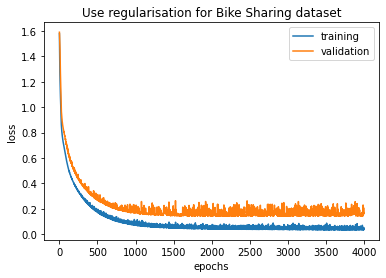

In [ ]:
plt.plot(np.arange(len(history_reg.history['loss'])), history_reg.history['loss'], label='training')
plt.plot(np.arange(len(history_reg.history['val_loss'])), history_reg.history['val_loss'], label='validation')
plt.title('Use regularisation for Bike Sharing dataset')
plt.xlabel('epochs')
plt.ylabel('loss')
plt.legend(loc=0)
plt.show()

In [ ]:
print('Minimum loss: ', min(history_reg.history['val_loss']),
      '\nAfter ', np.argmin(history_reg.history['val_loss']), ' epochs')

# Minimum loss:  0.13514482975
# After  3647  epochs

Minimum loss:  0.1417301446199417 
After  2261  epochs
